In [40]:
from typing import List, Dict
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
from pathlib import Path
import matplotlib.pyplot as plt
import load_workload_data as ld
import load_benchmark_data as bn


sns.set(rc={'figure.figsize':(30,40)})
sns.set(font_scale=6)

In [41]:
single_threaded_folder = Path("../data/tpch_singlethreaded/")
multi_threaded_folder: Path = Path("../data/tpch_multithreaded/")
sizes_folder: Path = Path("../data/tpch_singlethreaded/")
high_level_mult: DataFrame = bn.get_high_level(multi_threaded_folder, sizes_folder)
low_level_mult: DataFrame = bn.get_low_level(multi_threaded_folder)
high_level_single: DataFrame = bn.get_high_level(single_threaded_folder, sizes_folder)
low_level_single: DataFrame = bn.get_low_level(single_threaded_folder)
high_level_mult

,benchmark_run_name,Total Runtime (in seconds),avg_throughput,Compression Scheme,with_lto,Clients,multithreaded,float,int,string,Compression Scheme_baseline,Total Runtime (in seconds)_baseline,Runtime Library / Runtime Baseline,size_to_baseline
0,./tpch_Dictionary_14_shuffled.json,41.228798,0.336834,Dictionary,False,14,True,676386560.0,1.372782e+09,7.950671e+09,Dictionary,41.228798,1.000000,1.000000
1,./tpch_FrameOfReference_14_shuffled.json,38.446318,0.356780,FrameOfReference,False,14,True,676386560.0,9.912806e+08,7.950671e+09,Dictionary,41.228798,0.932511,0.722096
2,./tpch_SIMDCAI_14_shuffled.json,39.593418,0.346463,SIMDCAI,False,14,True,676386560.0,6.464946e+08,7.950671e+09,Dictionary,41.228798,0.960334,0.470938
3,./tpch_TurboPFOR_14_shuffled.json,41.378711,0.331666,TurboPFOR,False,14,True,676386560.0,6.514422e+08,7.950671e+09,Dictionary,41.228798,1.003636,0.474542
4,./tpch_TurboPFOR_bitpacking_14_shuffled.json,38.599272,0.355270,TurboPFOR_bitpacking,False,14,True,676386560.0,6.557167e+08,7.950671e+09,Dictionary,41.228798,0.936221,0.477655
5,./tpch_Unencoded_14_shuffled.json,36.699680,0.374132,Unencoded,False,14,True,676386560.0,1.266756e+09,7.950671e+09,Dictionary,41.228798,0.890147,0.922766
6,./tpch_Dictionary_28_shuffled.json,60.205721,0.460573,Dictionary,False,28,True,676386560.0,1.372782e+09,7.950671e+09,Dictionary,60.205721,1.000000,1.000000
7,./tpch_FrameOfReference_28_shuffled.json,55.875643,0.490804,FrameOfReference,False,28,True,676386560.0,9.912806e+08,7.950671e+09,Dictionary,60.205721,0.928079,0.722096
8,./tpch_SIMDCAI_28_shuffled.json,58.858771,0.465884,SIMDCAI,False,28,True,676386560.0,6.464946e+08,7.950671e+09,Dictionary,60.205721,0.977628,0.470938
9,./tpch_TurboPFOR_28_shuffled.json,60.672550,0.452128,TurboPFOR,False,28,True,676386560.0,6.514422e+08,7.950671e+09,Dictionary,60.205721,1.007754,0.474542


## Runtime

In [42]:
only_28_clients: DataFrame = low_level_mult[low_level_mult[bn.CLIENTS] == 28]
sns.catplot(data=only_28_clients, kind="bar", x=bn.QUERY_NAME, y=bn.AVG_DURATION, hue=bn.LIBRARY_NAME, height=90, aspect=2)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'FrameOfReference'),
  Text(1, 0, 'Dictionary'),
  Text(2, 0, 'TurboPFOR'),
  Text(3, 0, 'Unencoded'),
  Text(4, 0, 'SIMDCAI'),
  Text(5, 0, 'TurboPFOR_bitpacking')])

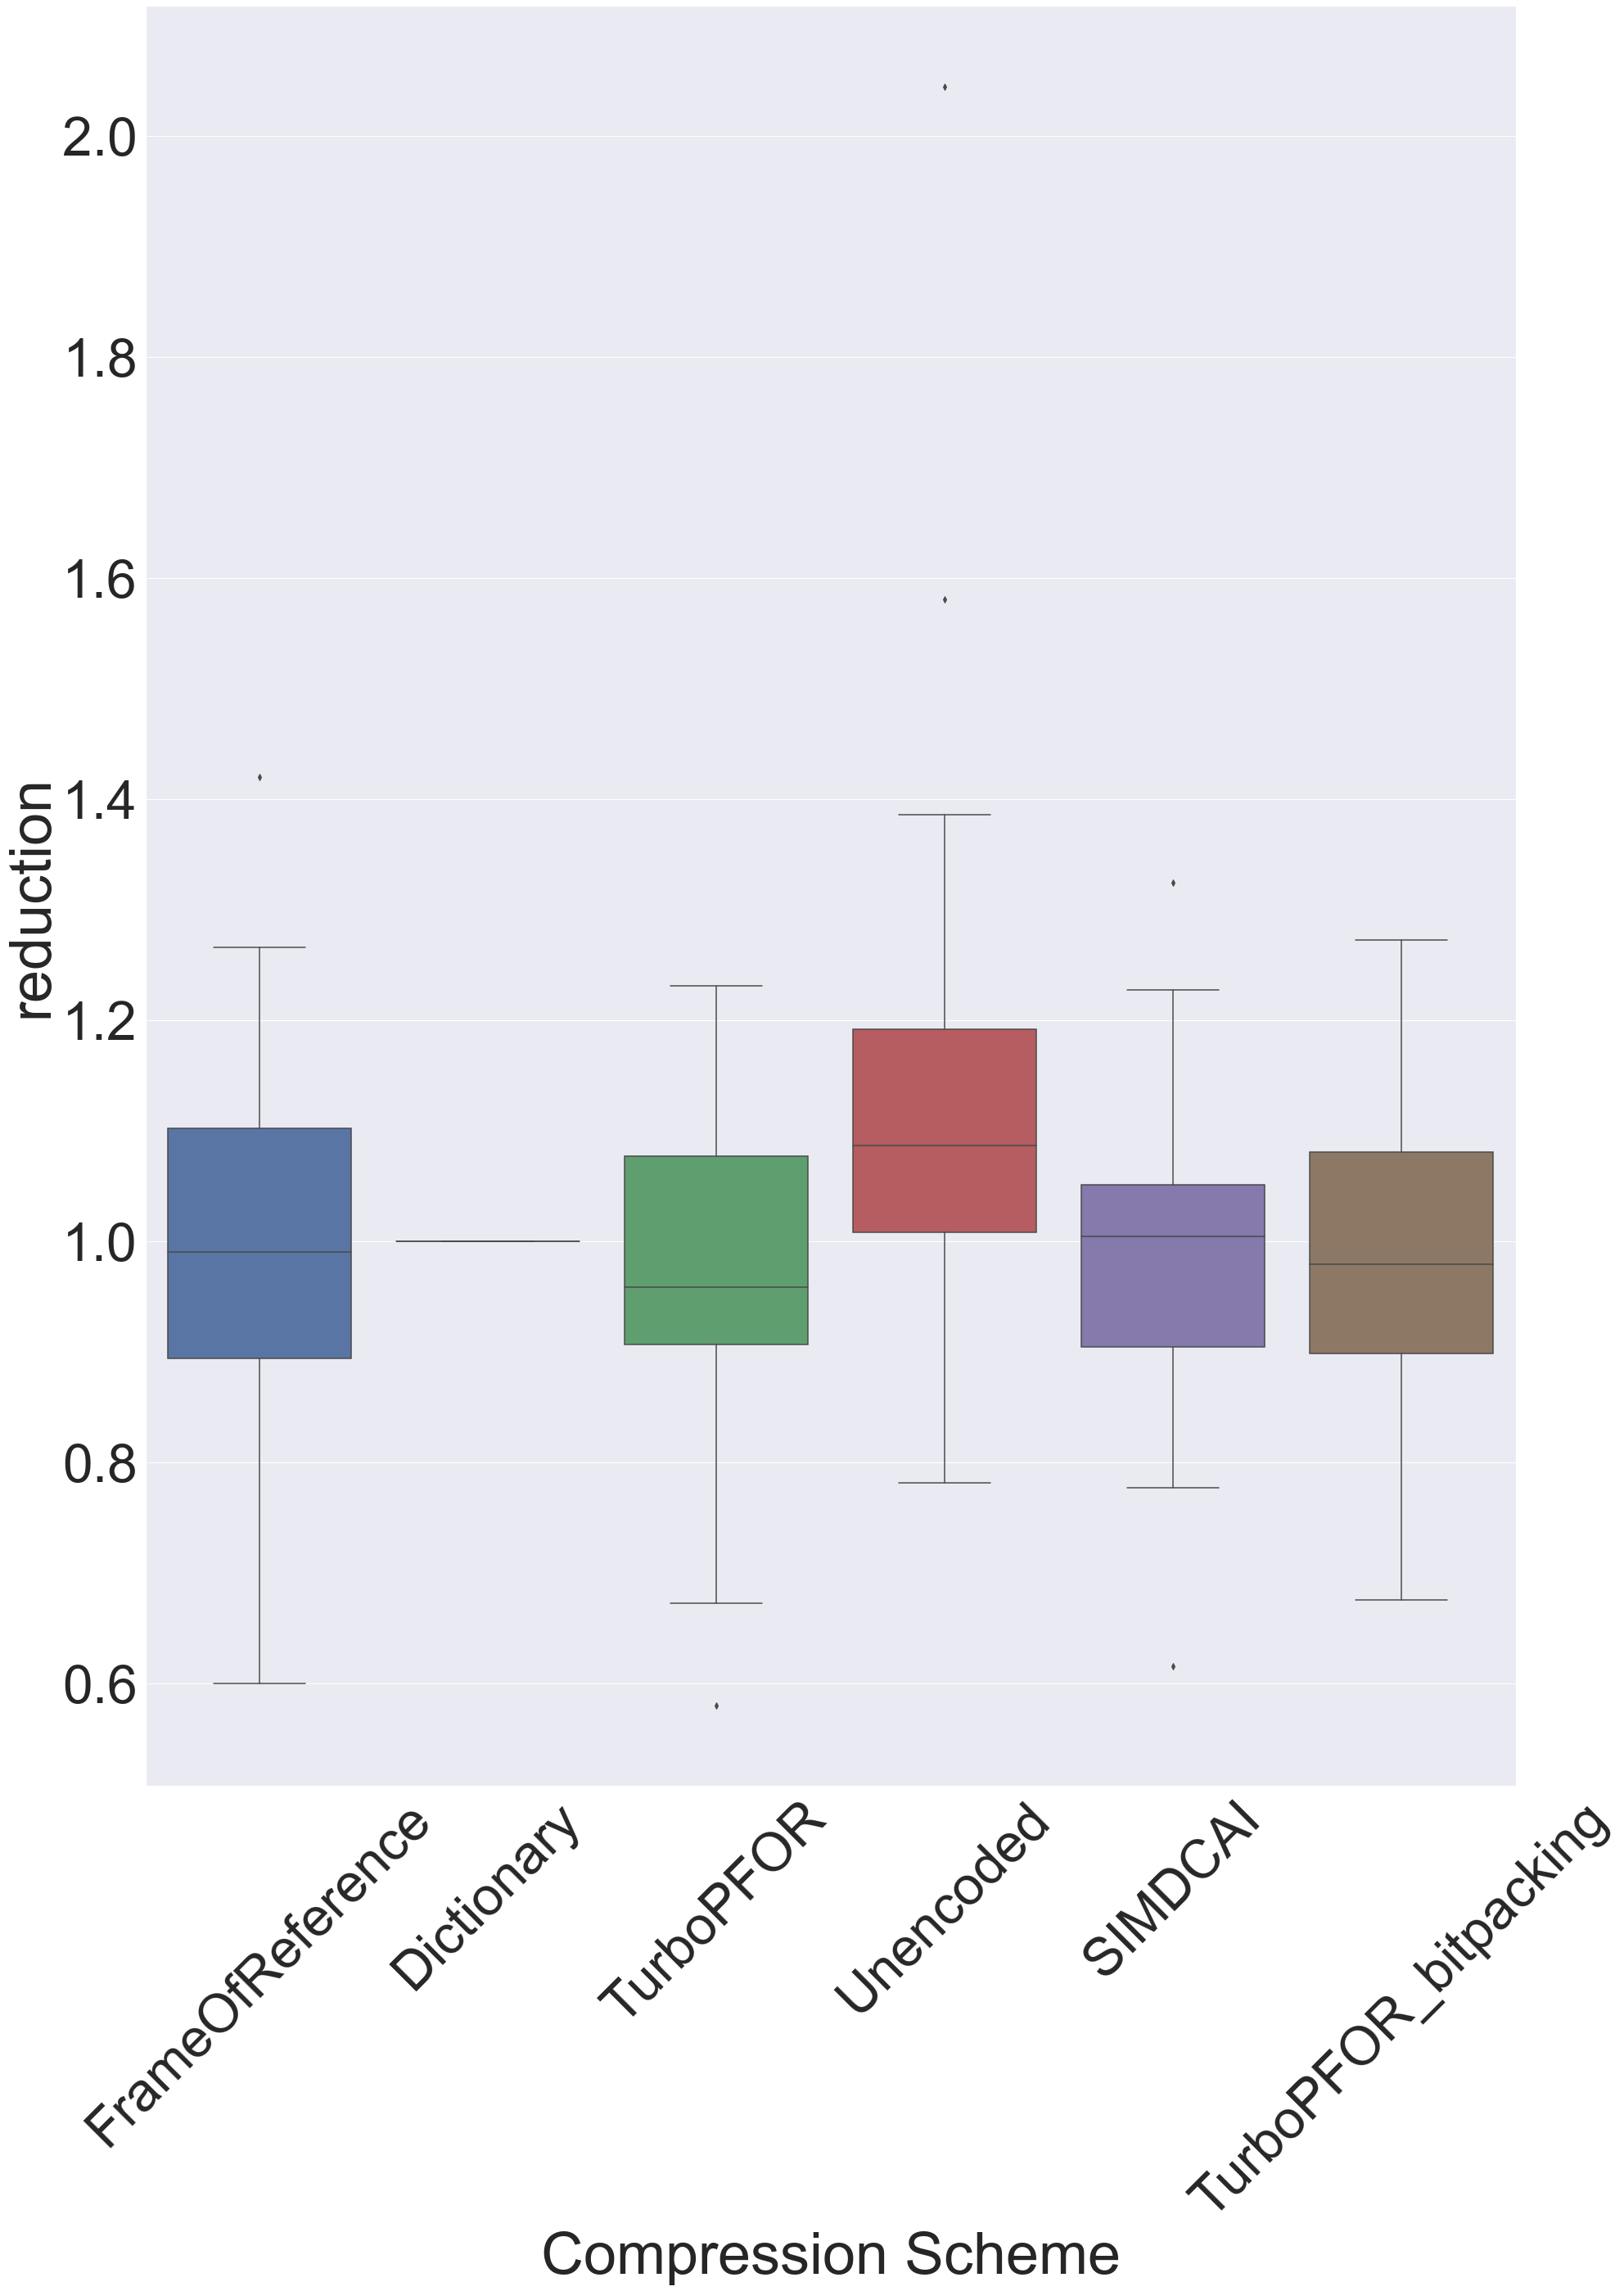

In [43]:
columns_to_merge: List[str] = [bn.QUERY_NAME, bn.LIBRARY_NAME, bn.RUNTIME_TO_BASELINE]
combined: DataFrame = low_level_single.merge(only_28_clients[columns_to_merge], on=[bn.LIBRARY_NAME, bn.QUERY_NAME])
combined[bn.REDUCTION] = [multi / single for single, multi
                         in zip(combined[f"{bn.RUNTIME_TO_BASELINE}_x"],
                                combined[f"{bn.RUNTIME_TO_BASELINE}_y"])]
sns.boxplot(data=combined, x=bn.LIBRARY_NAME, y=bn.REDUCTION)
plt.xticks(rotation=45)

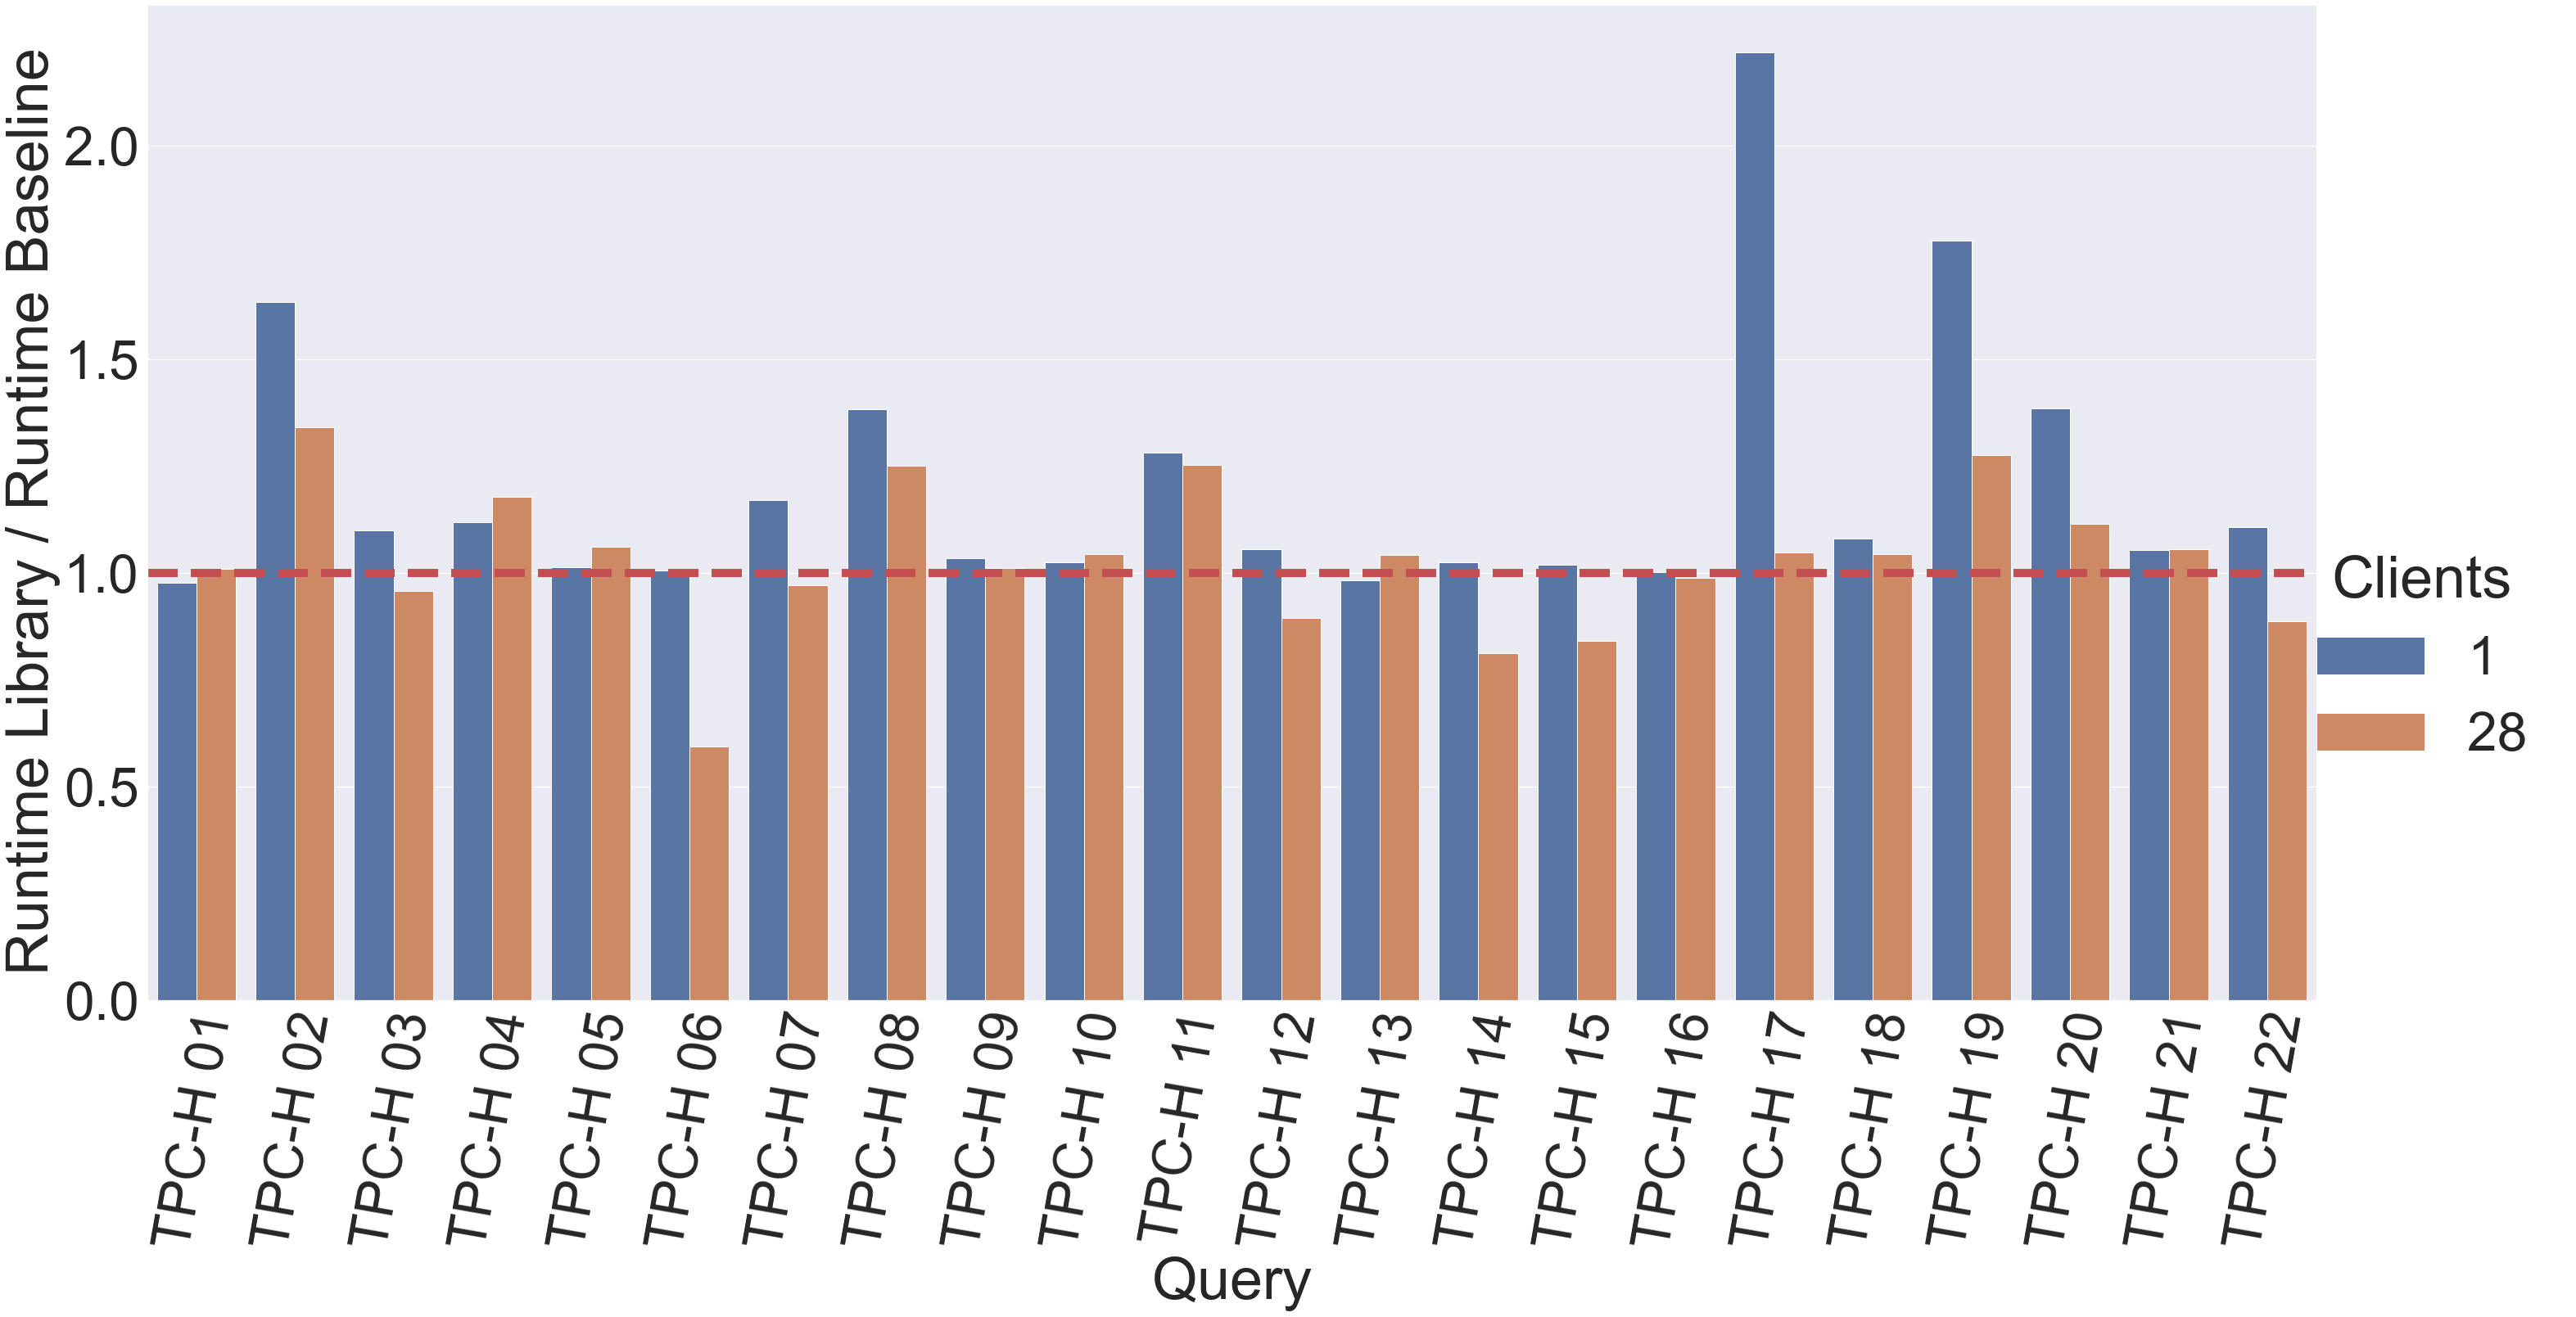

In [44]:
# Single vs. Multithreaded
single_with_unencoded_baseline: DataFrame = bn.get_relative_to_baseline_low_level(low_level_single, baseline="Unencoded")
multi_with_unencoded_baseline: DataFrame = bn.get_relative_to_baseline_low_level(only_28_clients, baseline="Unencoded")
appended: DataFrame = single_with_unencoded_baseline.append(multi_with_unencoded_baseline)
only_bitpacking: DataFrame = appended[appended[bn.LIBRARY_NAME] == "TurboPFOR_bitpacking"]
sns.catplot(data=only_bitpacking, x=bn.QUERY_NAME, y=bn.RUNTIME_TO_BASELINE, hue=bn.CLIENTS, kind="bar", height=20, aspect=2)
plt.xticks(rotation=80)
plt.axhline(y=1, color='r', linewidth=10, linestyle='--')
plt.savefig("visualizations/single_multithreaded.svg", bbox_inches="tight")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dictionary'),
  Text(1, 0, 'FrameOfReference'),
  Text(2, 0, 'SIMDCAI'),
  Text(3, 0, 'TurboPFOR'),
  Text(4, 0, 'TurboPFOR_bitpacking'),
  Text(5, 0, 'Unencoded')])

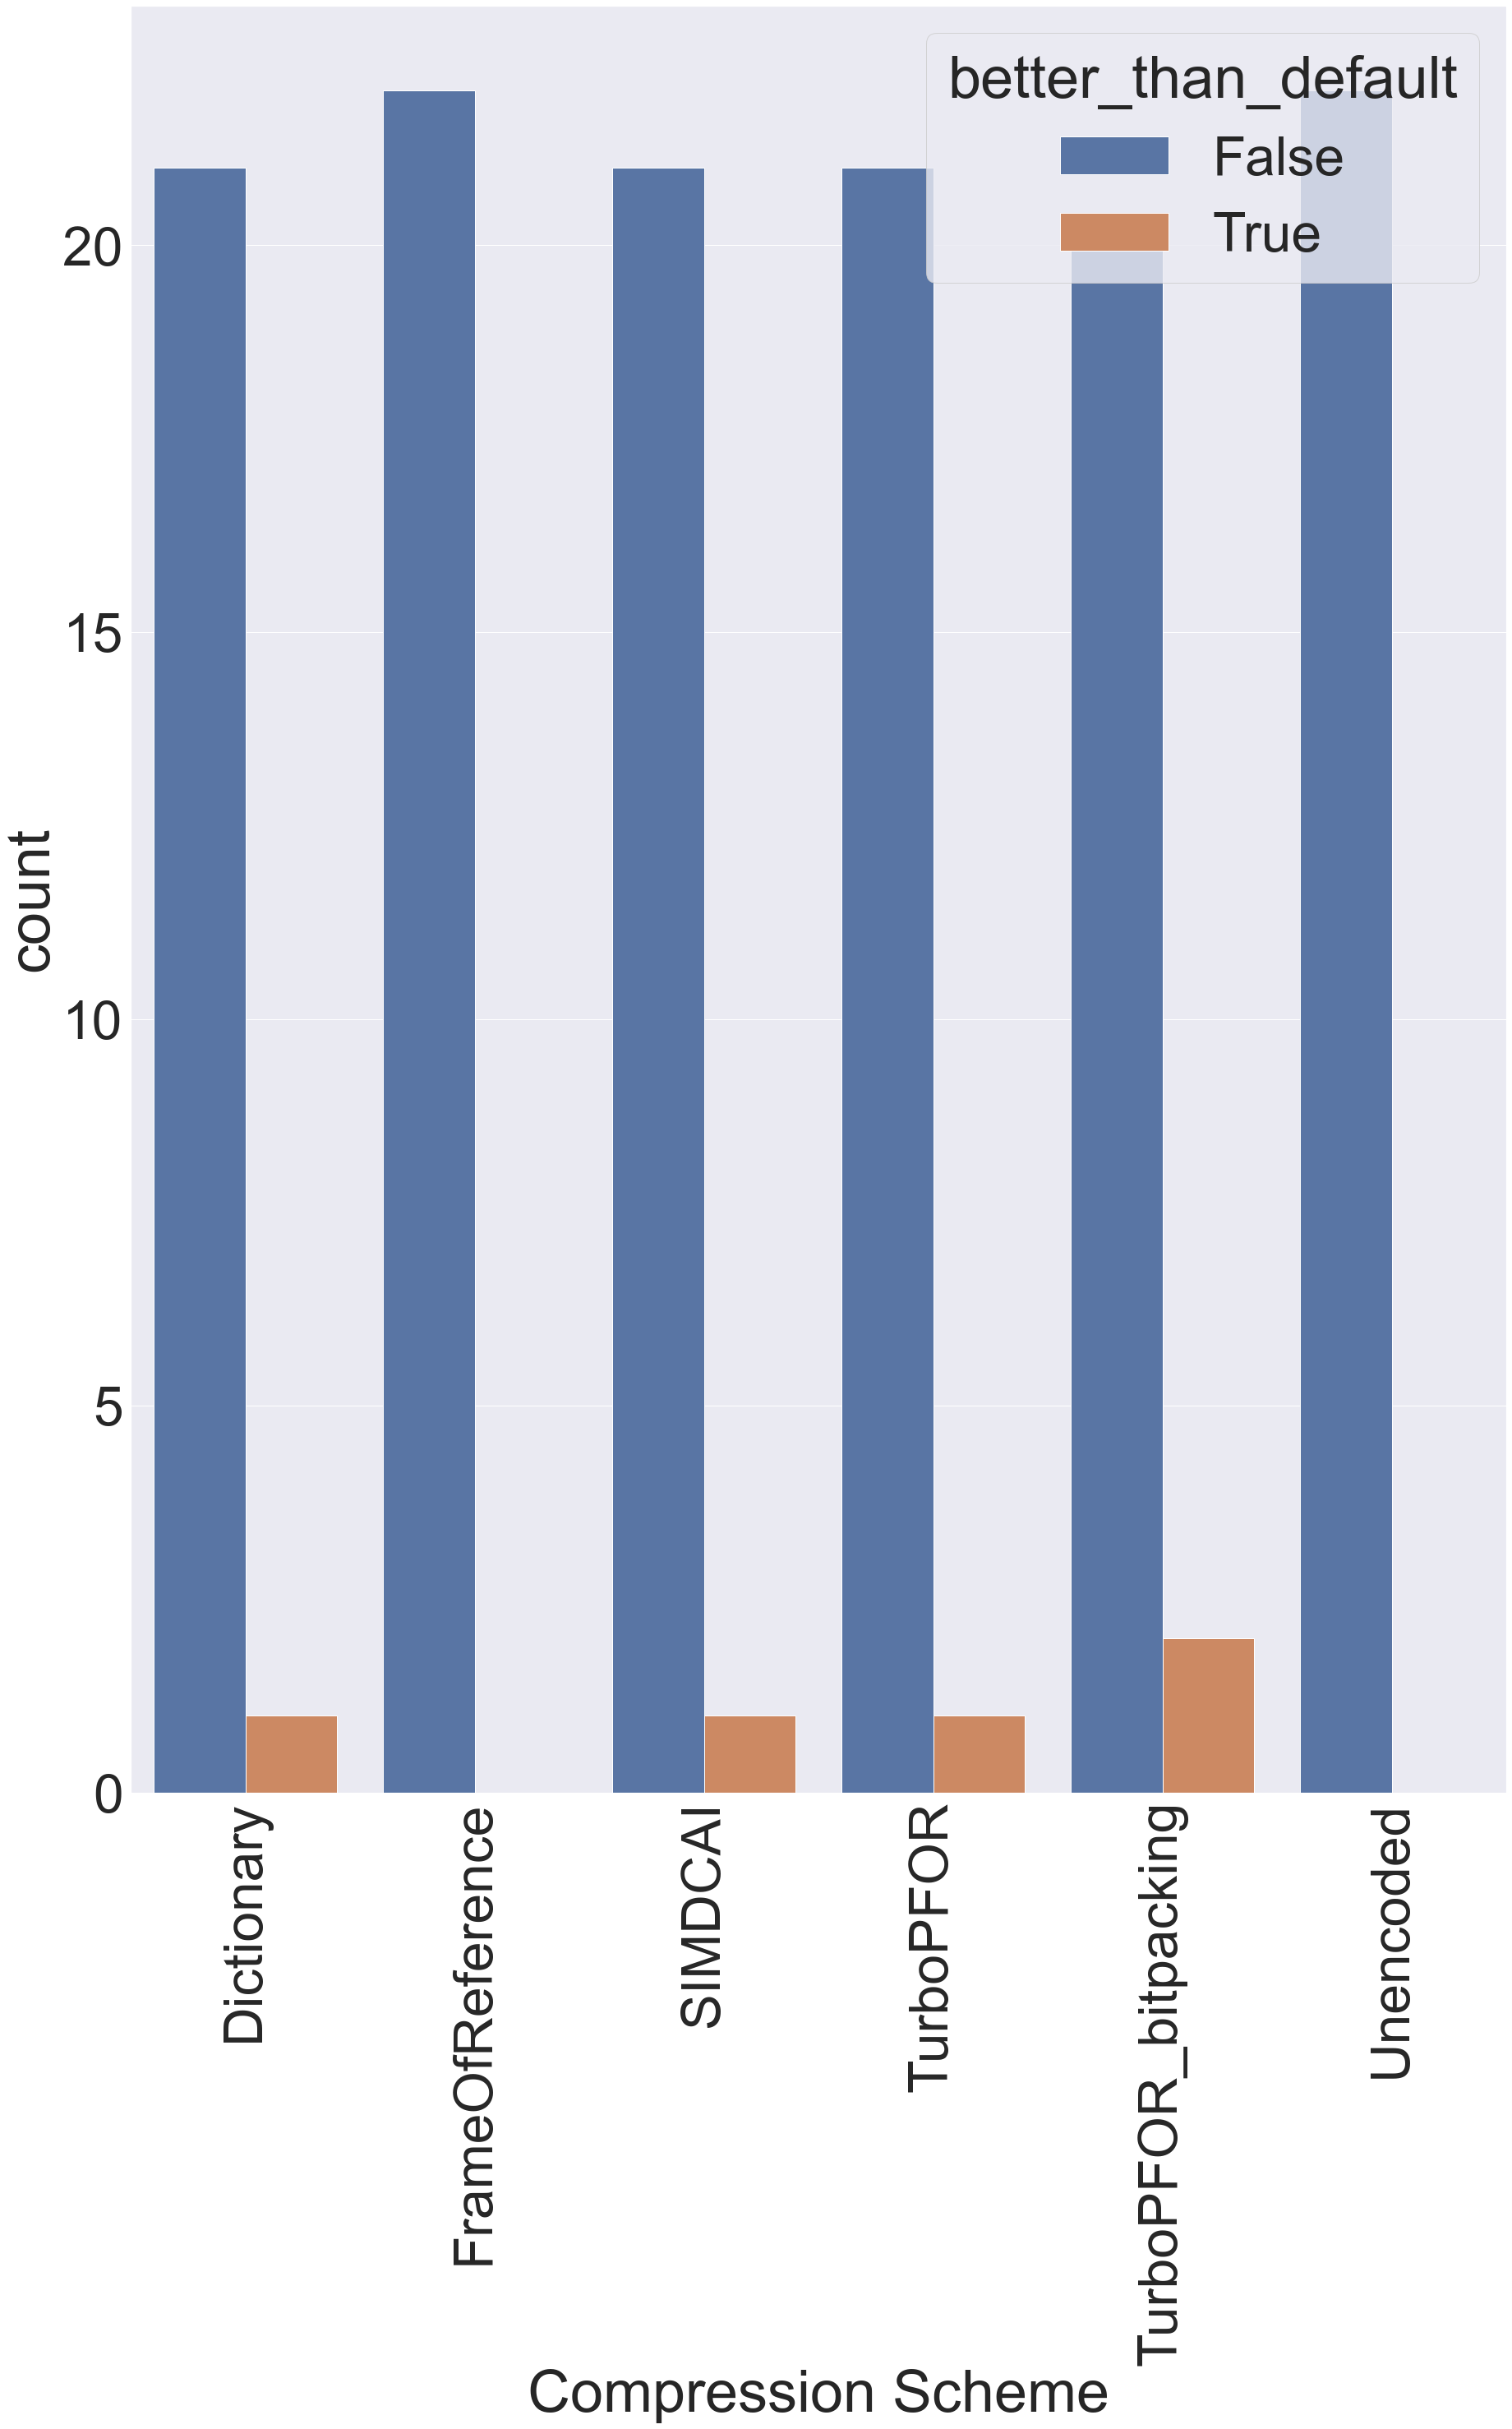

In [45]:
is_better_single: DataFrame = single_with_unencoded_baseline.copy()
is_better_multi: DataFrame = multi_with_unencoded_baseline.copy()
is_better_single[bn.BETTER_THAN_DEFAULT] = [rel_runtime < 1 for rel_runtime in is_better_single[bn.RUNTIME_TO_BASELINE]]
is_better_multi[bn.BETTER_THAN_DEFAULT] = [rel_runtime < 1 for rel_runtime in is_better_multi[bn.RUNTIME_TO_BASELINE]]
order: List[str] = sorted(is_better_single[bn.LIBRARY_NAME].drop_duplicates())
sns.countplot(data=is_better_single, x=bn.LIBRARY_NAME, hue=bn.BETTER_THAN_DEFAULT, order=order)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dictionary'),
  Text(1, 0, 'FrameOfReference'),
  Text(2, 0, 'SIMDCAI'),
  Text(3, 0, 'TurboPFOR'),
  Text(4, 0, 'TurboPFOR_bitpacking'),
  Text(5, 0, 'Unencoded')])

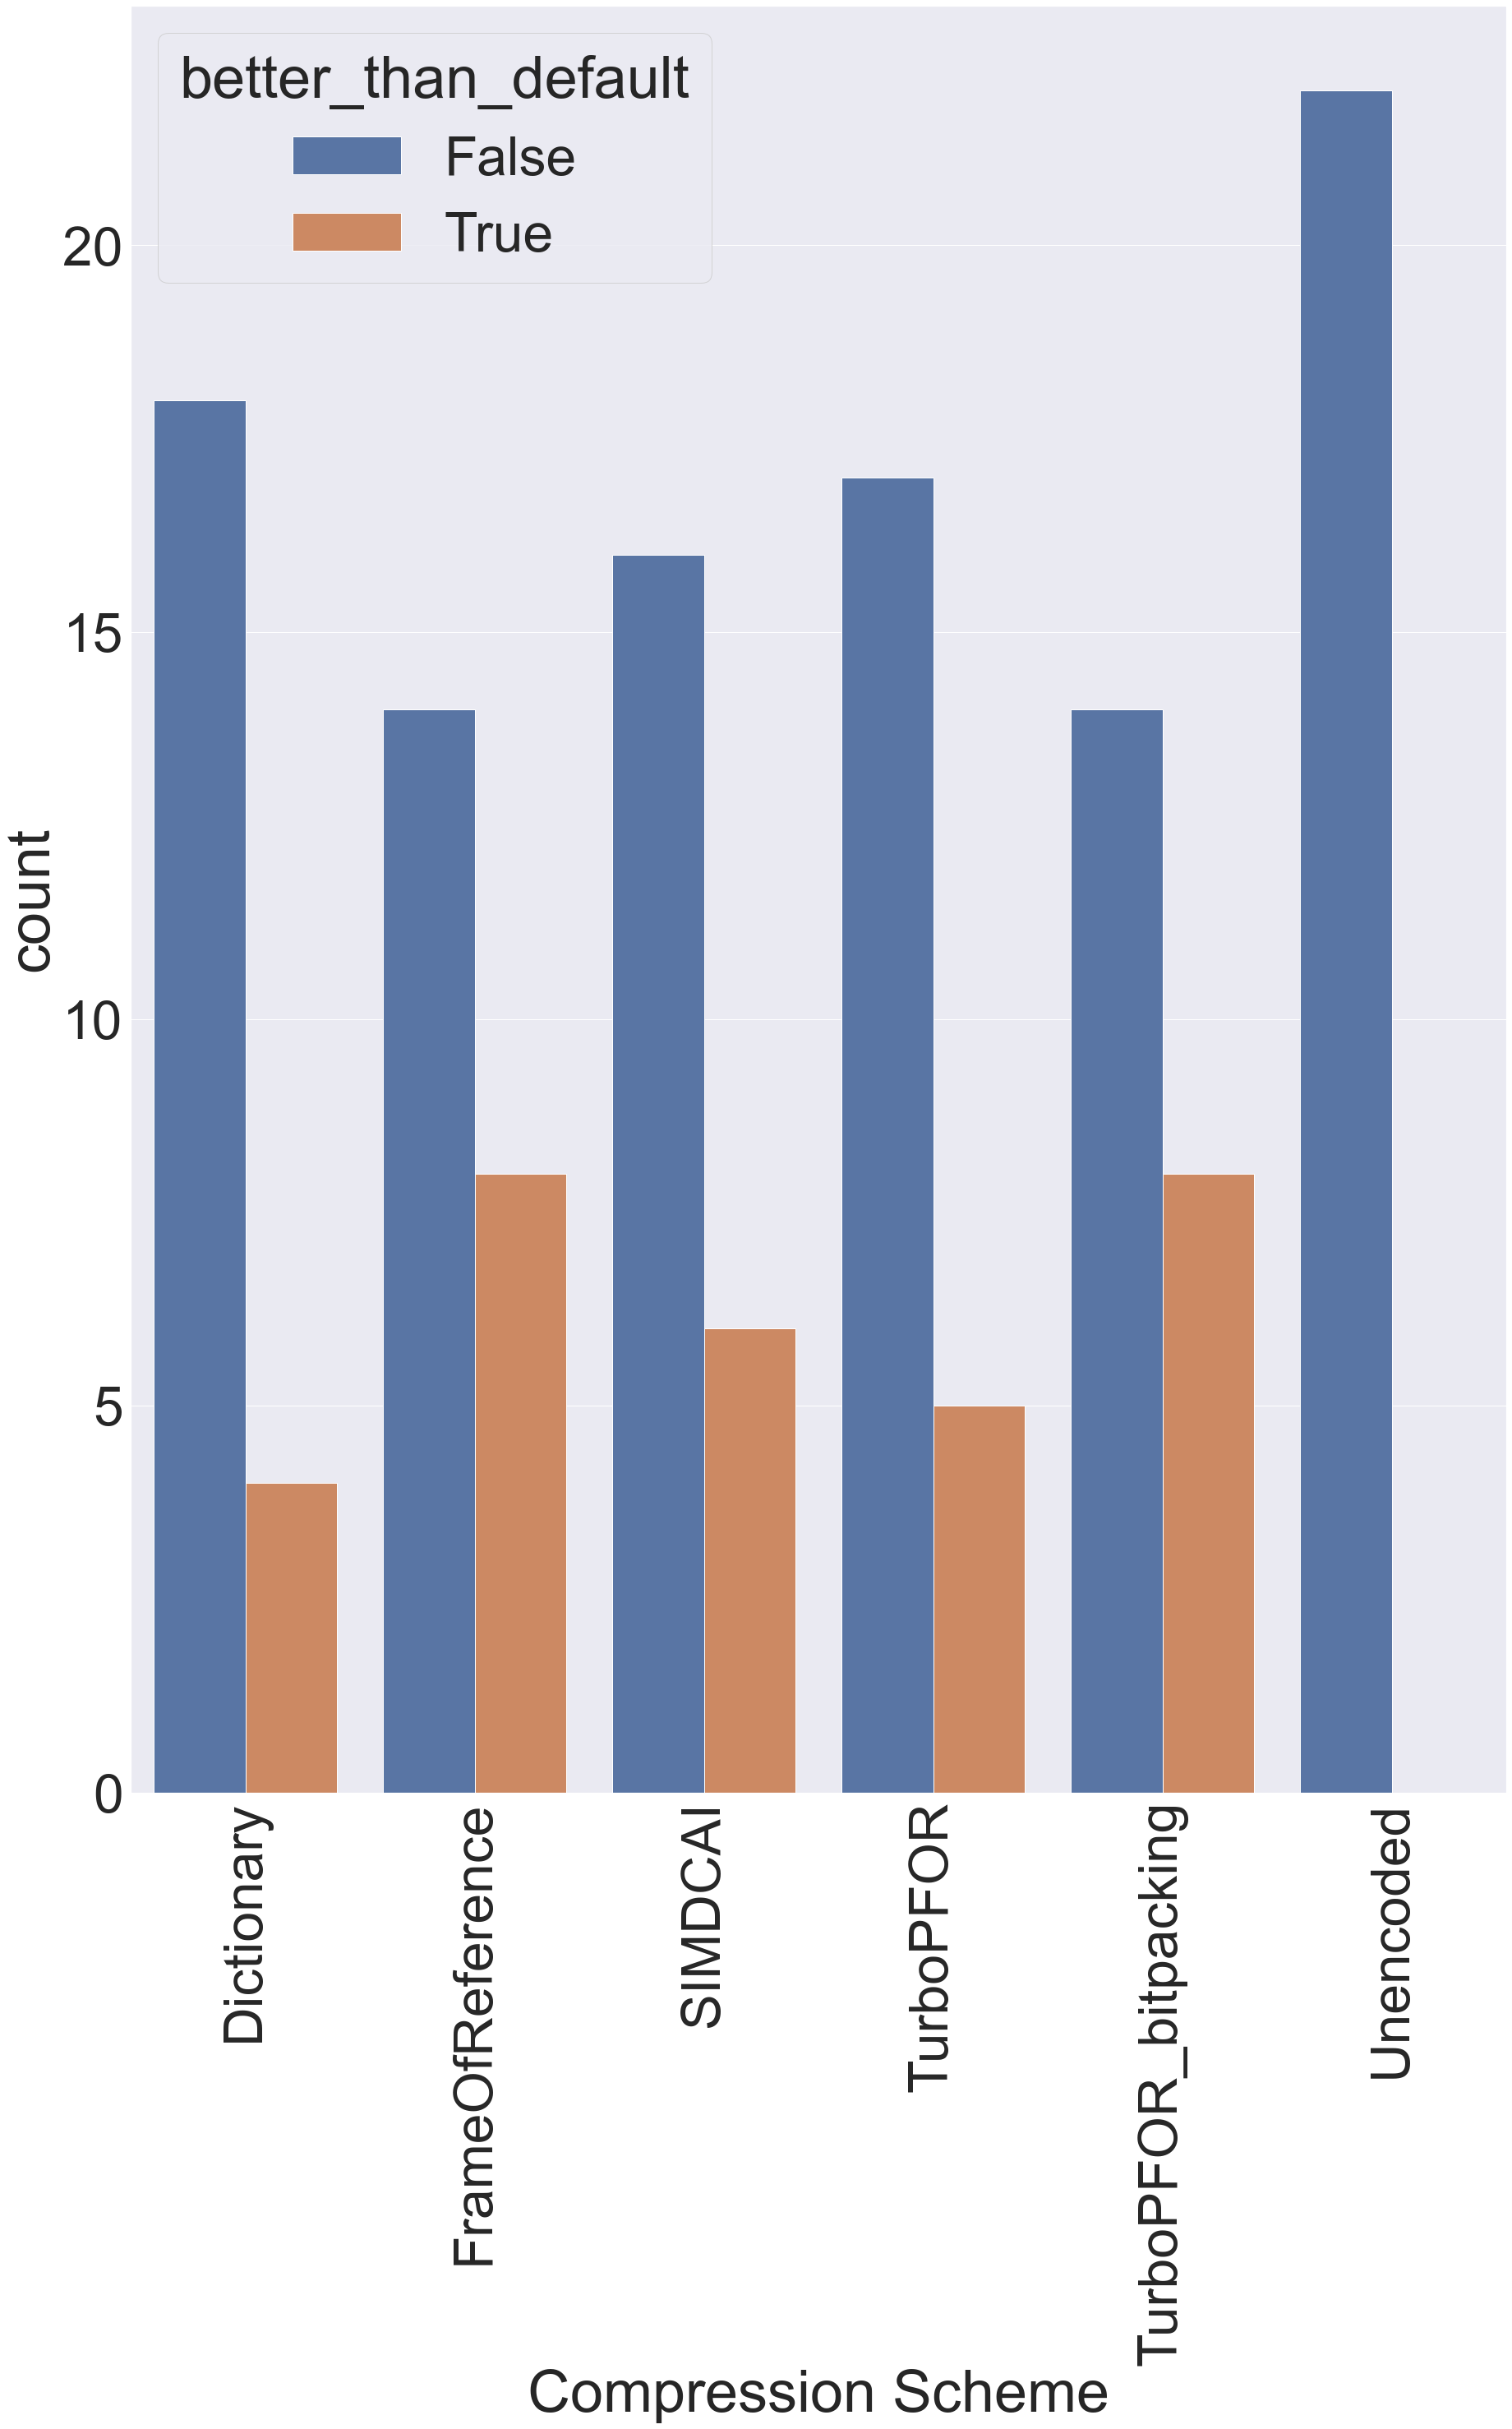

In [46]:
sns.countplot(data=is_better_multi, x=bn.LIBRARY_NAME, hue=bn.BETTER_THAN_DEFAULT, order=order)
plt.xticks(rotation=90)

In [47]:
integer_compressed: DataFrame = bn.load_sizes(sizes_folder / "sizes_Dictionary.txt")
dictionary: DataFrame = bn.load_sizes(sizes_folder / "sizes_Unencoded.txt")
columns_to_merge: List[str] = ["table_name", "chunk_id", "column_id", bn.SIZE_IN_BYTES]
merged: DataFrame = integer_compressed.merge(dictionary[columns_to_merge], on=["table_name", "chunk_id", "column_id"],
                                             suffixes=("","_baseline"))
merged

,table_name,chunk_id,column_id,column_name,Data Type,distinct_value_count,encoding_type,vector_compression_type,Size (in Bytes),point_accesses,sequential_accesses,monotonic_accesses,random_accesses,dictionary_accesses,Size (in GB),Size (in Bytes)_baseline
0,nation,0,0,n_nationkey,int,25,Dictionary,FixedSize1ByteAligned,221,1622,10200,20385,752,32207,2.210000e-07,284
1,nation,0,1,n_name,string,25,Dictionary,FixedSize1ByteAligned,1153,0,45275,0,102640500,40367376,1.153000e-06,1153
2,nation,0,2,n_regionkey,int,5,Dictionary,FixedSize1ByteAligned,141,0,68750,0,0,68750,1.410000e-07,284
3,nation,0,3,n_comment,string,25,Dictionary,FixedSize1ByteAligned,3035,0,25,0,0,25,3.035000e-06,3035
4,part,0,0,p_partkey,int,65535,Dictionary,FixedSize2ByteAligned,393306,0,17891055,2906903,1005258,20797958,3.933060e-04,262324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17811,customer,22,6,c_mktsegment,string,5,Dictionary,FixedSize1ByteAligned,58558,0,2620350,0,0,58450,5.855800e-05,58558
17812,customer,22,7,c_comment,string,58226,Dictionary,FixedSize2ByteAligned,6711930,0,58230,0,485556,58230,6.711930e-03,6711930
17813,region,0,0,r_regionkey,int,5,Dictionary,FixedSize1ByteAligned,121,2749,5,0,0,2754,1.210000e-07,204
17814,region,0,1,r_name,string,5,Dictionary,FixedSize1ByteAligned,333,0,13750,0,0,13750,3.330000e-07,333


In [48]:
# Get DB Columns where Int Compression Had the most impact
sizes_per_column = merged.groupby(["table_name", "column_name", bn.DATA_TYPE], as_index=False)[bn.SIZE_IN_BYTES, f"{bn.SIZE_IN_BYTES}_baseline"].sum()
sizes_per_column["compression"] = [x / y
                                     for x, y in zip(sizes_per_column[bn.SIZE_IN_BYTES],
                                                     sizes_per_column[f"{bn.SIZE_IN_BYTES}_baseline"])]
only_int_columns = sizes_per_column[sizes_per_column[bn.DATA_TYPE] == "int"]
only_int_columns

<ipython-input-48-1aea552730d8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sizes_per_column = merged.groupby(["table_name", "column_name", bn.DATA_TYPE], as_index=False)[bn.SIZE_IN_BYTES, f"{bn.SIZE_IN_BYTES}_baseline"].sum()


,table_name,column_name,Data Type,Size (in Bytes),Size (in Bytes)_baseline,compression
3,customer,c_custkey,int,9002208,6033452,1.492049
6,customer,c_nationkey,int,1504508,6033452,0.249361
12,lineitem,l_linenumber,int,60099636,240112756,0.250298
14,lineitem,l_orderkey,int,349234404,240112756,1.454460
15,lineitem,l_partkey,int,356116088,240112756,1.483120
22,lineitem,l_suppkey,int,296077600,240112756,1.233077
26,nation,n_nationkey,int,221,284,0.778169
27,nation,n_regionkey,int,141,284,0.496479
30,orders,o_custkey,int,88066192,60042140,1.466740
32,orders,o_orderkey,int,90021984,60042140,1.499313


In [49]:
dictionary.groupby([bn.DATA_TYPE], as_index=False)[bn.SIZE_IN_BYTES].sum()

,Data Type,Size (in Bytes)
0,float,676386560
1,int,1266756060
2,string,7950670887
